In [1]:
from torch_geometric.datasets import TUDataset
from torch_geometric.loader import DataLoader
import torch_geometric
import networkx as nx
import torch.nn.functional as F
import torch

In [2]:
dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES', use_node_attr=True)


Extracting /tmp/ENZYMES/ENZYMES/ENZYMES.zip
Processing...
Done!


In [55]:
loader = DataLoader(dataset, batch_size=32, shuffle=False)

In [3]:
graph = dataset[0]

In [28]:
graph.is_directed()

False

In [29]:
len(dataset)

600

In [27]:
graph

Data(edge_index=[2, 168], x=[37, 21], y=[1])

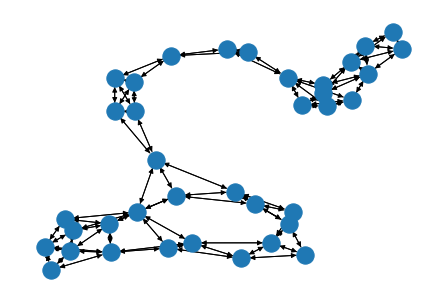

In [26]:
g = torch_geometric.utils.to_networkx(graph, to_undirected=False)
nx.draw(g)

In [56]:
for data in loader:
    print(data)
    break

DataBatch(edge_index=[2, 4264], x=[1069, 21], y=[32], batch=[1069], ptr=[33])


In [57]:
# count = 0
# value_ = None
# for id_ in data.batch:
#     if value_ is None or value_ != id_:
#         print(value_, count)
#         value_ = id_
#         count = 0
    
#     if value_ == id_:
#         count += 1
        
# print(value_, count)
    
    
        
    

None 0
tensor(0) 37
tensor(1) 23
tensor(2) 25
tensor(3) 24
tensor(4) 23
tensor(5) 24
tensor(6) 26
tensor(7) 88
tensor(8) 23
tensor(9) 32
tensor(10) 4
tensor(11) 14
tensor(12) 42
tensor(13) 41
tensor(14) 36
tensor(15) 55
tensor(16) 40
tensor(17) 38
tensor(18) 2
tensor(19) 35
tensor(20) 42
tensor(21) 41
tensor(22) 39
tensor(23) 42
tensor(24) 41
tensor(25) 40
tensor(26) 37
tensor(27) 23
tensor(28) 22
tensor(29) 34
tensor(30) 38
tensor(31) 38


- RaggedTensor
- TORCH.GATHER

In [53]:
(data.edge_index[:2, :50])

tensor([[ 0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
          3,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,  7,
          7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9, 10],
        [ 1,  2,  3,  0,  2,  3, 16, 17,  0,  1,  3,  4,  5, 24,  0,  1,  2,  4,
          5,  2,  3,  5, 26,  2,  3,  4,  6, 18, 25,  5,  7, 19, 23,  6,  8,  9,
         21, 27,  7,  9, 10, 20, 29,  7,  8, 10, 11, 31, 32,  8]])

In [65]:
graph

Data(edge_index=[2, 168], x=[37, 21], y=[1])

In [61]:
graph.edge_index[:,165:]

tensor([[36, 36, 36],
        [32, 33, 34]])

In [68]:
dataset[1].edge_index[:, :3]

tensor([[ 0,  0,  0],
        [ 1,  2, 15]])

In [69]:
data.edge_index[:, 165:171]

tensor([[36, 36, 36, 37, 37, 37],
        [32, 33, 34, 38, 39, 52]])

In [2]:
from torch_geometric.datasets import ShapeNet

dataset = ShapeNet(root='/tmp/ShapeNet', categories=['Airplane'])

dataset[0]


Extracting /tmp/ShapeNet/shapenetcore_partanno_segmentation_benchmark_v0_normal.zip
Processing...
Done!


Data(x=[2518, 3], y=[2518], pos=[2518, 3], category=[1])

In [1]:
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root='/tmp/Cora', name='Cora')
print(dataset)

Processing...


Cora()


Done!


In [2]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16)
        self.conv2 = GCNConv(16, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)


In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)
data = dataset[0].to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

In [8]:
a = torch.tensor([[1,2], [3,4]])

In [17]:
a1 = a.view(-1, 1)
a1

tensor([[1],
        [2],
        [3],
        [4]])

In [18]:
a2 = a.view(1, -1)
a2

tensor([[1, 2, 3, 4]])

In [11]:
b = torch.tensor([[5,6], [7,8]])

In [13]:
b * a

tensor([[ 5, 12],
        [21, 32]])

In [19]:
torch.mul(b,a1)

RuntimeError: The size of tensor a (2) must match the size of tensor b (4) at non-singleton dimension 0

In [4]:
torch.nested.nested_tensor([torch.tensor([2,3]), torch.tensor([1,4])])

/home/thanhduc/anaconda3/envs/envp38/lib/python3.8/site-packages/torch/nested/__init__.py:47: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. (Triggered internally at /opt/conda/conda-bld/pytorch_1670525491394/work/aten/src/ATen/NestedTensorImpl.cpp:175.)
  nt = torch._nested_tensor_from_tensor_list(new_data, dtype, None, device, pin_memory)


nested_tensor([
  tensor([2, 3]),
  tensor([1, 4])
])

In [2]:
import torch

In [3]:
b = torch.randn([2, 3])

In [7]:
b

tensor([[-0.4461, -1.5041, -0.4730],
        [ 0.2238,  0.1700,  0.3679]])

In [8]:
b.unsqueeze(2)

tensor([[[-0.4461],
         [-1.5041],
         [-0.4730]],

        [[ 0.2238],
         [ 0.1700],
         [ 0.3679]]])

In [23]:
embed = torch.tensor([[[1,2,3], [1,2,3,], [2,3,4], [4,5,6]]], dtype=torch.float32, requires_grad=True)
embed

tensor([[[1., 2., 3.],
         [1., 2., 3.],
         [2., 3., 4.],
         [4., 5., 6.]]], requires_grad=True)

In [24]:
embed.shape

torch.Size([1, 4, 3])

In [25]:
index = torch.tensor([[0,1,1,2]])

In [26]:
index = index.unsqueeze(-1).expand_as(embed)
index

tensor([[[0, 0, 0],
         [1, 1, 1],
         [1, 1, 1],
         [2, 2, 2]]])

In [34]:
out = torch.zeros(1,3,3)
out = out.scatter_reduce_(1,  index, embed, reduce="mean")

In [35]:
out

tensor([[[0.5000, 1.0000, 1.5000],
         [1.0000, 1.6667, 2.3333],
         [2.0000, 2.5000, 3.0000]]], grad_fn=<ScatterReduceBackward0>)

In [36]:
target = torch.randint(0,3, size=(1,3))
target

tensor([[2, 2, 2]])

In [37]:
loss = torch.nn.CrossEntropyLoss()
output = loss(out, target)
output.backward()

In [38]:
output

tensor(0.5072, grad_fn=<NllLoss2DBackward0>)

In [28]:
def broadcast(src: torch.Tensor, other: torch.Tensor):
    """
    Broadcast ``src`` to match the shape of ``other``.

    Args:
        src (`torch.Tensor`):
            The tensor to broadcast.
        other (`torch.Tensor`):
            The tensor to match the shape of.

    Returns:
        `torch.Tensor`: The broadcasted tensor.
    """
    for _ in range(src.dim(), other.dim()):
        src = src.unsqueeze(-1)
    src = src.expand_as(other)
    return src

In [29]:
scatter_off = torch.tensor([[0,1,1,2]])
index = broadcast(scatter_off, embed)

In [30]:
index

tensor([[[0, 0, 0],
         [1, 1, 1],
         [1, 1, 1],
         [2, 2, 2]]])

In [39]:
embed

tensor([[[1, 2, 3],
         [1, 2, 3],
         [2, 3, 4],
         [4, 5, 6]]])

tensor([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]])

In [56]:
size = list(embed.size())
size[1] = index.max() + 1
out = torch.zeros(size, dtype=embed.dtype, device=embed.device)
out
print(embed)
print(index)
print(out)
out.scatter_reduce_(1,  index, embed, reduce="sum")

tensor([[[1, 2, 3],
         [1, 2, 3],
         [2, 3, 4],
         [4, 5, 6]]])
tensor([[[0, 0, 0],
         [1, 1, 1],
         [1, 1, 1],
         [2, 2, 2]]])
tensor([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]])


tensor([[[1, 2, 3],
         [3, 5, 7],
         [4, 5, 6]]])

In [60]:
list(map(len, index[0]))

[3, 3, 3, 3]

In [61]:
embed

tensor([[[1, 2, 3],
         [1, 2, 3],
         [2, 3, 4],
         [4, 5, 6]]])

In [62]:
embed.view(-1, 3)

tensor([[1, 2, 3],
        [1, 2, 3],
        [2, 3, 4],
        [4, 5, 6]])

In [63]:
torch.reshape(embed, [-1, 3])

tensor([[1, 2, 3],
        [1, 2, 3],
        [2, 3, 4],
        [4, 5, 6]])

In [3]:
a = torch.tensor([[[1,2,3], [2,3,4]], [[4,5,6], [5,6,7]]])

In [12]:
a


2

In [66]:
a.transpose(0, 1)

tensor([[[1, 2, 3],
         [4, 5, 6]],

        [[2, 3, 4],
         [5, 6, 7]]])

In [1]:
import torch
from torch_sparse import transpose

index = torch.tensor([[1, 0, 1, 0, 2, 1],
                      [0, 1, 1, 1, 0, 0]])
value = torch.Tensor([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7]])

index, value = transpose(index, value, 3, 2)

# repeat

In [5]:
x = torch.tensor([1, 2, 3])
x.repeat(3,2,1)

tensor([[[1, 2, 3],
         [1, 2, 3]],

        [[1, 2, 3],
         [1, 2, 3]],

        [[1, 2, 3],
         [1, 2, 3]]])

In [3]:
x.repeat(3,2)

tensor([[1, 2, 3, 1, 2, 3],
        [1, 2, 3, 1, 2, 3],
        [1, 2, 3, 1, 2, 3]])

# scatter from torch_scatter

In [5]:
from torch_scatter import scatter
src = torch.ones(4, 7)
# index = torch.tensor([0, 1, 0, 1, 2, 1, 0])
index = torch.tensor([0, 1, 0, 2])
# Broadcasting in the first and last dim.
out = scatter(src, index, dim=0, reduce="sum")
print(src)
print(out.size())
print(out)

tensor([[1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.]])
torch.Size([3, 7])
tensor([[2., 2., 2., 2., 2., 2., 2.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.]])


In [40]:
a = torch.rand(5)
print(a)

tensor([0.1558, 0.7741, 0.2345, 0.5097, 0.0635])


In [41]:
a.unsqueeze(0).repeat(2, 1)

tensor([[0.1558, 0.7741, 0.2345, 0.5097, 0.0635],
        [0.1558, 0.7741, 0.2345, 0.5097, 0.0635]])

In [42]:
a.repeat(2, 1)

tensor([[0.1558, 0.7741, 0.2345, 0.5097, 0.0635],
        [0.1558, 0.7741, 0.2345, 0.5097, 0.0635]])

# index reduce

In [3]:
x = torch.zeros(5, 3)
print(x)
t = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]], dtype=torch.float)
index = torch.tensor([0, 4, 2, 0])
print(x.index_reduce_(0, index, t, 'mean'))
x = torch.zeros(5, 3)
print(x.index_reduce_(0, index, t, 'mean', include_self=False))

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([[3.6667, 4.3333, 5.0000],
        [0.0000, 0.0000, 0.0000],
        [3.5000, 4.0000, 4.5000],
        [0.0000, 0.0000, 0.0000],
        [2.0000, 2.5000, 3.0000]])
tensor([[5.5000, 6.5000, 7.5000],
        [2.0000, 2.0000, 2.0000],
        [7.0000, 8.0000, 9.0000],
        [2.0000, 2.0000, 2.0000],
        [4.0000, 5.0000, 6.0000]])


In [7]:
index = torch.tensor([0, 4, 2, 0, 1])
out = scatter(x, index, dim=0, reduce="mean")
out

tensor([[3.7500, 4.2500, 4.7500],
        [4.0000, 5.0000, 6.0000],
        [7.0000, 8.0000, 9.0000],
        [0.0000, 0.0000, 0.0000],
        [2.0000, 2.0000, 2.0000]])

In [ ]:
src = torch.ones((2, 5))
index = torch.tensor([[0, 1, 2, 0, 0]])
torch.zeros(3, 5, dtype=src.dtype).scatter_add_(0, index, src)

# batch matrix * matrix

In [2]:
input = torch.empty(2, 2, )
mat2 = torch.randn(10, 4, 5)
res = torch.bmm(input, mat2)
res.size()

torch.Size([10, 3, 5])

In [45]:
import torch

a = torch.rand((2,1,3)) #  torch.FloatTensor([[1], [2], [3]]) # 
b = torch.FloatTensor([[1, 10, 100]]) # 
print(a)
print(b)
print(a.shape)
print(b.shape)
# 3,1 x 1,3

tensor([[[0.3715, 0.7659, 0.5179]],

        [[0.9831, 0.1152, 0.1839]]])
tensor([[  1.,  10., 100.]])
torch.Size([2, 1, 3])
torch.Size([1, 3])


In [46]:
c = a * b
print(c)
c.shape


tensor([[[ 0.3715,  7.6590, 51.7880]],

        [[ 0.9831,  1.1522, 18.3943]]])


torch.Size([2, 1, 3])

In [42]:
torch.matmul(a,b)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (2x3 and 1x3)

In [40]:
torch.mul(a, b)

tensor([[[ 0.9155,  5.9375, 83.5520]],

        [[ 0.9823,  1.7305, 28.2391]]])

In [48]:
a, b = torch.broadcast_tensors(a, b)
print(a)
print(b)
print(a * b)

tensor([[[0.3715, 0.7659, 0.5179]],

        [[0.9831, 0.1152, 0.1839]]])
tensor([[[  1.,  10., 100.]],

        [[  1.,  10., 100.]]])
tensor([[[ 0.3715,  7.6590, 51.7880]],

        [[ 0.9831,  1.1522, 18.3943]]])


In [49]:
a.shape

torch.Size([2, 1, 3])

In [50]:
b.shape

torch.Size([2, 1, 3])

In [7]:
a = torch.FloatTensor([[[1 ,2], [3,2], [2,2]]])
print(a)
a.shape

tensor([[[1., 2.],
         [3., 2.],
         [2., 2.]]])


torch.Size([1, 3, 2])

In [8]:
b = torch.FloatTensor([[1, 1, 0]])
print(b)
b.shape

tensor([[1., 1., 0.]])


torch.Size([1, 3])

In [14]:
torch.broadcast_to(b.unsqueeze(-1), a.shape)

tensor([[[1., 1.],
         [1., 1.],
         [0., 0.]]])

# torch matmul

In [11]:
# vector x vector
tensor1 = torch.randn(3)
tensor2 = torch.randn(3)
torch.matmul(tensor1, tensor2).size()
# matrix x vector
tensor1 = torch.randn(3, 4)
tensor2 = torch.randn(4)
torch.matmul(tensor1, tensor2).size()
# batched matrix x broadcasted vector
tensor1 = torch.randn(10, 3, 4)
tensor2 = torch.randn(4)
torch.matmul(tensor1, tensor2).size()
# batched matrix x batched matrix
tensor1 = torch.randn(10, 3, 4)
tensor2 = torch.randn(10, 4, 5)
torch.matmul(tensor1, tensor2).size()
# batched matrix x broadcasted matrix
tensor1 = torch.randn(10, 3, 4)
tensor2 = torch.randn(4, 5)
torch.matmul(tensor1, tensor2).size()

torch.Size([10, 3, 5])

In [29]:
tensor1 = torch.randn(10, 3, 4)
tensor2 = torch.randn(2,3)

In [30]:
tensor2 * tensor1

RuntimeError: The size of tensor a (3) must match the size of tensor b (4) at non-singleton dimension 2

In [33]:
tensor1 = torch.randn(3, 4)
tensor2 = torch.randn(4)
print(tensor1)
print(tensor2)
torch.matmul(tensor1, tensor2).size()

tensor([[-0.2285, -0.9117, -0.5721,  1.2026],
        [-0.4751,  0.3486, -1.6404,  0.5665],
        [-1.1853, -1.1240, -1.3030,  0.3055]])
tensor([ 0.1175, -0.5322,  0.1352, -1.9153])


torch.Size([3])

In [34]:
torch.matmul(tensor1, tensor2)

tensor([-1.9222, -1.5482, -0.3024])

In [51]:
a = torch.tensor([[0, 2.], [3, 0]])
c = a.to_sparse()
c

tensor(indices=tensor([[0, 1],
                       [1, 0]]),
       values=tensor([2., 3.]),
       size=(2, 2), nnz=2, layout=torch.sparse_coo)

In [52]:
c.to_dense()

tensor([[0., 2.],
        [3., 0.]])

# mask

In [ ]:
zero_vec  = -9e15*torch.ones_like(e)
torch.where(adj > 0, e, zero_vec)

In [7]:
a = b = torch.randn(3,1)
print(a)
print(b)

tensor([[-1.0912],
        [-0.6433],
        [-0.3505]])
tensor([[-1.0912],
        [-0.6433],
        [-0.3505]])


In [9]:
b.T

tensor([[-1.0912, -0.6433, -0.3505]])

In [8]:
a + b.T

tensor([[-2.1825, -1.7345, -1.4418],
        [-1.7345, -1.2866, -0.9938],
        [-1.4418, -0.9938, -0.7011]])

In [4]:
input = torch.randn(2, 3, 3)
mat2 = torch.randn(2, 3, 1)
res = torch.bmm(input, mat2)
print(input)
print(mat2)
print(res.size())
res

tensor([[[-2.6925,  1.5406,  1.2076],
         [-0.7612,  0.0386, -0.4941],
         [-1.2136, -0.6964, -0.8587]],

        [[-0.4346,  0.0431,  0.0729],
         [ 1.1719, -0.5907, -0.2126],
         [-0.5932,  0.3428,  1.6255]]])
tensor([[[-0.8545],
         [ 0.8984],
         [-0.2851]],

        [[-0.2194],
         [ 0.5071],
         [ 1.7608]]])
torch.Size([2, 3, 1])


tensor([[[ 3.3405],
         [ 0.8260],
         [ 0.6562]],

        [[ 0.2456],
         [-0.9310],
         [ 3.1661]]])

In [18]:
torch.matmul(input, mat2)b

tensor([[[-0.0449,  1.4065, -0.8436, -3.0381],
         [ 1.1967,  0.8379,  0.7549, -1.8568],
         [-2.6070, -0.8054, -2.3068,  1.0809]],

        [[-0.3909,  0.5506, -1.4419,  1.3596],
         [-1.1239,  1.8671, -2.7578,  2.5871],
         [-0.2091, -0.2654, -0.8734,  0.5342]]])

In [75]:
from torch import nn

class TinyModel(nn.Module):
    def __init__(self):
        super(TinyModel, self).__init__()
        self.layer_1 = nn.Parameter(torch.Tensor(2,3))
        self.layer_2 = nn.Linear(3,4)
        
    def getmodule(self, value):
        func = self.get_submodule("layer_2")
        return self.lambda_func(func, value)
    
    def lambda_func(self, func, x):
        return func(x)
        

        

In [76]:
# class TinyModel(torch.nn.Module):

#     def __init__(self):
#         super(TinyModel, self).__init__()

#         self.linear1 = torch.nn.Linear(100, 200)
#         self.activation = torch.nn.ReLU()
#         self.linear2 = torch.nn.Linear(200, 10)
#         self.softmax = torch.nn.Softmax()

# #     def forward(self, x):
# #         x = self.linear1(x)
# #         x = self.activation(x)
# #         x = self.linear2(x)
# #         x = self.softmax(x)
# #         return x

In [77]:
testM = TinyModel()
testM

TinyModel(
  (layer_2): Linear(in_features=3, out_features=4, bias=True)
)

In [78]:
testM.layer_2

Linear(in_features=3, out_features=4, bias=True)

In [86]:
testM.getmodule(torch.randn([1,2,3]))

tensor([[[ 0.9976,  0.1931,  0.2150, -0.9850],
         [ 0.2250, -1.5307,  0.2673,  0.4487]]], grad_fn=<ViewBackward0>)

In [91]:
m = nn.Linear(20, 30)
input = torch.randn(128, 20)
output = m(input)
print(output)
print(output.size())

tensor([[-0.5361, -0.1506,  0.7491,  ...,  0.5931,  0.4492,  0.0372],
        [-0.3519, -0.3717, -0.5288,  ...,  0.6650,  0.4107, -0.5336],
        [ 0.1041,  0.3968, -0.4804,  ..., -0.0122, -0.0053, -0.4502],
        ...,
        [-0.1119, -0.4209,  0.1437,  ..., -0.1077,  0.5869, -0.4976],
        [-0.0254,  0.4178, -0.0572,  ...,  0.4413,  0.1628,  0.4391],
        [-0.0652,  0.5218,  1.2668,  ...,  0.9935,  0.1673,  0.5460]],
       grad_fn=<AddmmBackward0>)
torch.Size([128, 30])


In [94]:
out2 = output.contiguous().view((-1, 6, 5))
print(out2)
out2.shape

tensor([[[-0.5361, -0.1506,  0.7491, -0.5274,  0.3127],
         [-0.4076, -0.8173, -0.0919, -0.0917, -0.2610],
         [ 0.4891, -0.5454,  0.3776, -0.5221, -0.0437],
         [ 0.0167,  0.5704,  0.1342, -0.4706, -0.2656],
         [-0.6229,  0.3151, -0.7061, -0.0502, -0.8039],
         [ 0.0129, -0.4722,  0.5931,  0.4492,  0.0372]],

        [[-0.3519, -0.3717, -0.5288,  0.9108, -0.2030],
         [ 0.1698, -0.4420, -0.2214, -0.0045,  0.4349],
         [-0.0020,  1.3311, -0.3566,  0.9612, -0.1109],
         [-0.4429, -0.2430,  0.8446, -0.0776, -0.0684],
         [ 0.0100, -0.5385, -0.5288,  0.4301, -0.3539],
         [ 0.1816, -0.4447,  0.6650,  0.4107, -0.5336]],

        [[ 0.1041,  0.3968, -0.4804,  0.5020,  0.6740],
         [-0.5005,  0.3595, -0.0494, -0.6094,  0.1756],
         [-0.6735,  0.2017,  0.5575,  0.2879,  0.7248],
         [ 0.9862,  0.2144, -0.2330, -0.0152,  0.6790],
         [ 0.7914,  0.6435,  0.8287, -0.1754,  0.7432],
         [-0.1948,  0.7756, -0.0122, -0.0053

torch.Size([128, 6, 5])

In [98]:
# shape = (NH, N, FOUT) * (NH, FOUT, 1) -> (NH, N, 1)
a = torch.randn(1, 2, 3, 4)
b = torch.randn(2, 4, 5)
print(a)
print(b)
print(torch.matmul(a,b))

tensor([[[[-0.8887,  0.9907, -0.5306, -1.3798],
          [-0.4869, -0.7119,  0.6179,  0.8950],
          [ 0.2122, -1.1567,  0.8572,  0.4676]],

         [[-0.4268, -0.2832, -2.9457, -1.4698],
          [ 1.0020,  0.7030, -0.2365, -1.0019],
          [-1.0149,  1.2080, -1.0502,  1.5074]]]])
tensor([[[ 0.2303,  0.1645,  1.2870, -0.6488, -1.5775],
         [-0.0315,  0.0994, -0.7151,  0.1262, -0.2871],
         [ 1.1536,  1.1802, -0.1916, -0.5879, -0.3676],
         [-0.3232,  0.2124,  0.4090,  1.5663,  1.2334]],

        [[-0.8294,  1.5773, -0.6030,  0.5701,  0.8383],
         [-0.6874,  0.0519, -0.7508, -1.3064, -0.9570],
         [ 2.8885,  0.0407, -0.6056, -0.0500,  0.5338],
         [-0.3800, -2.0780, -2.1801,  0.4717, -0.8855]]])
tensor([[[[-0.4020, -0.9670, -2.3149, -1.1477, -0.3893],
          [ 0.3338,  0.7686,  0.1302,  1.2646,  1.8491],
          [ 0.9230,  1.0309,  1.1273, -0.0553,  0.2589]],

         [[-7.4016,  2.2465,  5.4583, -0.4193, -0.3578],
          [-1.6167,  3.68

In [99]:
torch.matmul(a,b).shape

torch.Size([1, 2, 3, 5])

In [101]:
a = torch.matmul(a,b)

In [103]:
a.transpose(1, 2)

tensor([[[[-0.4020, -0.9670, -2.3149, -1.1477, -0.3893],
          [-7.4016,  2.2465,  5.4583, -0.4193, -0.3578]],

         [[ 0.3338,  0.7686,  0.1302,  1.2646,  1.8491],
          [-1.6167,  3.6893,  1.1954, -0.8080,  0.9281]],

         [[ 0.9230,  1.0309,  1.1273, -0.0553,  0.2589],
          [-3.5947, -4.7134, -2.9453, -1.3930, -3.9022]]]])

In [137]:
adj = torch.tensor([[[1, 0, 0], [1, 1, 0]],
                   [[1, 0, 1], [1, 1, 1]]])
print(adj)
adj.shape

tensor([[[1, 0, 0],
         [1, 1, 0]],

        [[1, 0, 1],
         [1, 1, 1]]])


torch.Size([2, 2, 3])

In [138]:
a = torch.randn(2, 5, 2, 3)
a

tensor([[[[-0.4822, -0.0178,  0.3449],
          [ 0.4014,  0.0889, -1.5110]],

         [[-0.4124,  0.9122,  1.1509],
          [ 0.6244,  1.3731, -2.1654]],

         [[ 1.6051,  1.0748,  1.6426],
          [-0.3079,  1.0083, -0.0819]],

         [[ 0.4948,  0.0735,  0.7671],
          [ 0.2356,  1.3984, -0.3200]],

         [[ 1.4243,  0.1170,  0.5477],
          [-2.0184, -0.0449, -0.4591]]],


        [[[ 1.4477,  0.8894, -0.7654],
          [ 0.0771,  0.0155,  0.2147]],

         [[ 0.8560, -0.5180,  0.3874],
          [-0.3460,  0.0646,  1.1167]],

         [[ 2.0198, -0.5144,  0.9842],
          [-0.3480,  0.2860,  0.1568]],

         [[-0.0598, -0.5821, -0.5376],
          [ 1.5125, -0.5673,  0.5276]],

         [[ 0.1902,  0.1223, -0.2185],
          [ 1.7085,  0.3927, -0.3142]]]])

In [120]:
a_ = a.transpose(1, 2).contiguous().view(2,2,15)
a_

tensor([[[-0.3917, -0.4661,  0.2860,  0.4412, -0.0109, -0.4268, -2.2067,
          -0.4550,  0.0418,  1.3372,  0.2990, -1.0912,  0.1575,  0.6896,
          -0.6303],
         [ 0.4717, -1.8733,  0.4473,  1.4985,  1.3031,  0.2894,  0.1112,
           0.3966,  1.3949,  0.1727, -1.3157,  0.2693, -0.3524,  1.1040,
           0.0677]],

        [[-0.1619,  0.0631,  0.8767, -0.0843,  1.1073, -0.7028, -0.2302,
          -0.1312,  0.8973,  1.3692,  0.4989,  1.8757,  0.3554, -0.0702,
          -1.9843],
         [ 0.0736, -0.9571,  1.6451, -0.3945, -0.8824, -0.0745,  0.0317,
           0.1370,  0.6408, -1.1406,  1.8019,  0.6822,  0.1927,  0.3938,
          -1.8474]]])

In [123]:
a_.shape

torch.Size([2, 2, 15])

In [140]:
zero_vec = torch.zeros_like(a) # -9e15*torch.ones_like(a)
torch.where(adj.unsqueeze(1) > 0, a, zero_vec)

tensor([[[[-0.4822,  0.0000,  0.0000],
          [ 0.4014,  0.0889,  0.0000]],

         [[-0.4124,  0.0000,  0.0000],
          [ 0.6244,  1.3731,  0.0000]],

         [[ 1.6051,  0.0000,  0.0000],
          [-0.3079,  1.0083,  0.0000]],

         [[ 0.4948,  0.0000,  0.0000],
          [ 0.2356,  1.3984,  0.0000]],

         [[ 1.4243,  0.0000,  0.0000],
          [-2.0184, -0.0449,  0.0000]]],


        [[[ 1.4477,  0.0000, -0.7654],
          [ 0.0771,  0.0155,  0.2147]],

         [[ 0.8560,  0.0000,  0.3874],
          [-0.3460,  0.0646,  1.1167]],

         [[ 2.0198,  0.0000,  0.9842],
          [-0.3480,  0.2860,  0.1568]],

         [[-0.0598,  0.0000, -0.5376],
          [ 1.5125, -0.5673,  0.5276]],

         [[ 0.1902,  0.0000, -0.2185],
          [ 1.7085,  0.3927, -0.3142]]]])

In [143]:
adj.unsqueeze(1)

tensor([[[[1, 0, 0],
          [1, 1, 0]]],


        [[[1, 0, 1],
          [1, 1, 1]]]])

In [144]:
mask = torch.tensor([[True, False, False, True], [False, True, False, False], [True, True, True, True]])

In [147]:
data = torch.arange(12, dtype=torch.float).reshape(3, 4)
data
mask = torch.tensor([[True, False, False, True], [False, True, False, False], [True, True, True, True]])
mt = masked_tensor(data, mask)
data.select(0, 1)
mask.select(0, 1)
mt.select(0, 1)

NameError: name 'masked_tensor' is not defined

In [149]:
import torch.nn.functional as F
F.softmax(dim=-1, input=torch.where(adj.unsqueeze(1) > 0, a, zero_vec))

tensor([[[[0.2359, 0.3821, 0.3821],
          [0.4165, 0.3047, 0.2788]],

         [[0.2487, 0.3757, 0.3757],
          [0.2740, 0.5793, 0.1467]],

         [[0.7134, 0.1433, 0.1433],
          [0.1642, 0.6124, 0.2234]],

         [[0.4506, 0.2747, 0.2747],
          [0.2005, 0.6412, 0.1584]],

         [[0.6750, 0.1625, 0.1625],
          [0.0636, 0.4577, 0.4787]]],


        [[[0.7438, 0.1749, 0.0813],
          [0.3239, 0.3045, 0.3716]],

         [[0.4876, 0.2072, 0.3052],
          [0.1465, 0.2209, 0.6326]],

         [[0.6722, 0.0892, 0.2386],
          [0.2202, 0.4151, 0.3648]],

         [[0.3729, 0.3959, 0.2312],
          [0.6674, 0.0834, 0.2492]],

         [[0.4014, 0.3319, 0.2667],
          [0.7140, 0.1915, 0.0945]]]])

In [27]:
a = torch.randn(2, 4, 3)
print(a)
a = a.to_sparse().requires_grad_(True)
a

tensor([[[ 0.7186, -0.9084, -0.4748],
         [ 0.7181,  0.2678,  0.9451],
         [-0.6219,  0.4507, -0.7076],
         [-0.2822,  0.6828,  1.1808]],

        [[ 0.4110,  0.7200,  1.3870],
         [-1.9289, -0.2845,  0.1280],
         [-0.1881, -0.4865,  1.5141],
         [-0.5664, -0.4936,  1.5625]]])


tensor(indices=tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
                        1, 1, 1, 1, 1],
                       [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 0, 0, 0, 1, 1, 1, 2,
                        2, 2, 3, 3, 3],
                       [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
                        1, 2, 0, 1, 2]]),
       values=tensor([ 0.7186, -0.9084, -0.4748,  0.7181,  0.2678,  0.9451,
                      -0.6219,  0.4507, -0.7076, -0.2822,  0.6828,  1.1808,
                       0.4110,  0.7200,  1.3870, -1.9289, -0.2845,  0.1280,
                      -0.1881, -0.4865,  1.5141, -0.5664, -0.4936,  1.5625]),
       size=(2, 4, 3), nnz=24, layout=torch.sparse_coo, requires_grad=True)

In [28]:
a.shape

torch.Size([2, 4, 3])

In [29]:
b = torch.randn(2, 3, 2, requires_grad=True)
b

tensor([[[-0.4960,  0.4860],
         [-0.2830,  0.2406],
         [-2.8291,  0.1400]],

        [[ 1.7333,  2.1607],
         [ 1.9934, -1.0519],
         [ 0.3991, -0.9574]]], requires_grad=True)

In [33]:
c = torch.randn(2, 4, 3, requires_grad=True)
c

tensor([[[ 0.9757,  0.4408, -1.5297],
         [-2.1233,  1.5924,  1.0148],
         [-0.2270,  1.6552,  1.1347],
         [ 1.7440,  2.7509,  1.4305]],

        [[-0.8694,  0.9145,  0.5313],
         [ 0.2648, -0.2019,  0.6071],
         [ 1.7587,  0.4898, -0.3319],
         [ 0.2020, -1.3538, -0.8029]]], requires_grad=True)

In [34]:
torch.matmul(c, b)

tensor([[[ 3.7190,  0.3661],
         [-2.2686, -0.5066],
         [-3.5659,  0.4468],
         [-5.6905,  1.7098]],

        [[ 0.5282, -3.3491],
         [ 0.2988,  0.2033],
         [ 3.8922,  3.6026],
         [-2.6691,  2.6292]]], grad_fn=<UnsafeViewBackward0>)

In [32]:
torch.sparse.mm(a, b)

RuntimeError: The expanded size of the tensor (3) must match the existing size (2) at non-singleton dimension 1.  Target sizes: [2, 3].  Tensor sizes: [4, 2]

In [41]:
# sparse matrix concate
a = torch.randn(2, 4).to_sparse()
b = torch.randn(2, 4).to_sparse()
print(a)
print(b)
print(a + b)

tensor(indices=tensor([[0, 0, 0, 0, 1, 1, 1, 1],
                       [0, 1, 2, 3, 0, 1, 2, 3]]),
       values=tensor([-1.1565, -2.2538, -0.8145,  0.3900,  0.6550,  0.7687,
                       0.5693,  0.1601]),
       size=(2, 4), nnz=8, layout=torch.sparse_coo)
tensor(indices=tensor([[0, 0, 0, 0, 1, 1, 1, 1],
                       [0, 1, 2, 3, 0, 1, 2, 3]]),
       values=tensor([ 0.3108, -0.0935,  1.1385, -1.0607, -0.7062,  0.2481,
                      -0.1198,  0.4308]),
       size=(2, 4), nnz=8, layout=torch.sparse_coo)
tensor(indices=tensor([[0, 0, 0, 0, 1, 1, 1, 1],
                       [0, 1, 2, 3, 0, 1, 2, 3]]),
       values=tensor([-0.8456, -2.3473,  0.3240, -0.6706, -0.0512,  1.0168,
                       0.4495,  0.5909]),
       size=(2, 4), nnz=8, layout=torch.sparse_coo)


In [42]:
(a + b).to_dense()

tensor([[-0.8456, -2.3473,  0.3240, -0.6706],
        [-0.0512,  1.0168,  0.4495,  0.5909]])

In [44]:
a.to_dense()

tensor([[-1.1565, -2.2538, -0.8145,  0.3900],
        [ 0.6550,  0.7687,  0.5693,  0.1601]])

In [45]:
b.to_dense()

tensor([[ 0.3108, -0.0935,  1.1385, -1.0607],
        [-0.7062,  0.2481, -0.1198,  0.4308]])

In [ ]:
x = torch.tensor([1, 2, 3])
x.repeat_interleave(2)
y = torch.tensor([[1, 2], [3, 4]])
torch.repeat_interleave(y, 2)
torch.repeat_interleave(y, 3, dim=1)
torch.repeat_interleave(y, torch.tensor([1, 2]), dim=0)
torch.repeat_interleave(y, torch.tensor([1, 2]), dim=0, output_size=3)

In [3]:
x = torch.randn([2, 2, 3])
x

tensor([[[-0.9738,  1.5415,  0.9540],
         [ 1.0533, -1.7983, -0.6583]],

        [[-0.6900,  1.8060,  0.8635],
         [-0.6415, -0.0498, -1.9861]]])

In [5]:
torch.repeat_interleave(x, 3, dim=1)

tensor([[[-0.9738,  1.5415,  0.9540],
         [-0.9738,  1.5415,  0.9540],
         [-0.9738,  1.5415,  0.9540],
         [ 1.0533, -1.7983, -0.6583],
         [ 1.0533, -1.7983, -0.6583],
         [ 1.0533, -1.7983, -0.6583]],

        [[-0.6900,  1.8060,  0.8635],
         [-0.6900,  1.8060,  0.8635],
         [-0.6900,  1.8060,  0.8635],
         [-0.6415, -0.0498, -1.9861],
         [-0.6415, -0.0498, -1.9861],
         [-0.6415, -0.0498, -1.9861]]])

In [8]:
q = torch.randn(2,3,4)
q

tensor([[[ 1.7375, -0.0528,  0.4294, -0.6883],
         [-1.3300,  1.7302, -0.7414, -1.0524],
         [ 1.3406, -0.4192,  0.2672,  1.0464]],

        [[ 0.3662, -0.2151,  1.6550, -2.4974],
         [ 1.2353, -0.1010,  0.1362,  0.5616],
         [ 0.2395, -0.6140,  1.7288, -0.4278]]])

In [9]:
q = q.unsqueeze(2)
print(q)
q.shape

tensor([[[[ 1.7375, -0.0528,  0.4294, -0.6883]],

         [[-1.3300,  1.7302, -0.7414, -1.0524]],

         [[ 1.3406, -0.4192,  0.2672,  1.0464]]],


        [[[ 0.3662, -0.2151,  1.6550, -2.4974]],

         [[ 1.2353, -0.1010,  0.1362,  0.5616]],

         [[ 0.2395, -0.6140,  1.7288, -0.4278]]]])


torch.Size([2, 3, 1, 4])

In [10]:
k = torch.randn(2,3,4)
k

tensor([[[ 0.8283,  0.7894,  1.3976,  0.2343],
         [ 0.5169, -0.2210, -0.3557,  1.0152],
         [ 2.0628,  1.3065,  0.6177, -2.0418]],

        [[ 1.5130, -1.8882,  1.4448,  1.3678],
         [-0.3798, -0.2988, -0.9901,  0.6470],
         [ 1.8593, -1.2601,  0.6725, -0.4812]]])

In [11]:
k = k.unsqueeze(1)
print(k)
k.shape

tensor([[[[ 0.8283,  0.7894,  1.3976,  0.2343],
          [ 0.5169, -0.2210, -0.3557,  1.0152],
          [ 2.0628,  1.3065,  0.6177, -2.0418]]],


        [[[ 1.5130, -1.8882,  1.4448,  1.3678],
          [-0.3798, -0.2988, -0.9901,  0.6470],
          [ 1.8593, -1.2601,  0.6725, -0.4812]]]])


torch.Size([2, 1, 3, 4])

In [14]:
kre = torch.repeat_interleave(k, repeats=3, dim=1)
print(kre)
kre.shape

tensor([[[[ 0.8283,  0.7894,  1.3976,  0.2343],
          [ 0.5169, -0.2210, -0.3557,  1.0152],
          [ 2.0628,  1.3065,  0.6177, -2.0418]],

         [[ 0.8283,  0.7894,  1.3976,  0.2343],
          [ 0.5169, -0.2210, -0.3557,  1.0152],
          [ 2.0628,  1.3065,  0.6177, -2.0418]],

         [[ 0.8283,  0.7894,  1.3976,  0.2343],
          [ 0.5169, -0.2210, -0.3557,  1.0152],
          [ 2.0628,  1.3065,  0.6177, -2.0418]]],


        [[[ 1.5130, -1.8882,  1.4448,  1.3678],
          [-0.3798, -0.2988, -0.9901,  0.6470],
          [ 1.8593, -1.2601,  0.6725, -0.4812]],

         [[ 1.5130, -1.8882,  1.4448,  1.3678],
          [-0.3798, -0.2988, -0.9901,  0.6470],
          [ 1.8593, -1.2601,  0.6725, -0.4812]],

         [[ 1.5130, -1.8882,  1.4448,  1.3678],
          [-0.3798, -0.2988, -0.9901,  0.6470],
          [ 1.8593, -1.2601,  0.6725, -0.4812]]]])


torch.Size([2, 3, 3, 4])

In [17]:
kre.size()

torch.Size([2, 3, 3, 4])

In [22]:
new_x_shape = q.size()[:-1] + (2, 2)
q_new = q.view(*new_x_shape)
print(q_new.size())
q_new = q_new.permute(0, 3, 1, 2, 4)
print(q_new.size())
q_new

torch.Size([2, 3, 1, 2, 2])
torch.Size([2, 2, 3, 1, 2])


tensor([[[[[ 1.7375, -0.0528]],

          [[-1.3300,  1.7302]],

          [[ 1.3406, -0.4192]]],


         [[[ 0.4294, -0.6883]],

          [[-0.7414, -1.0524]],

          [[ 0.2672,  1.0464]]]],



        [[[[ 0.3662, -0.2151]],

          [[ 1.2353, -0.1010]],

          [[ 0.2395, -0.6140]]],


         [[[ 1.6550, -2.4974]],

          [[ 0.1362,  0.5616]],

          [[ 1.7288, -0.4278]]]]])

In [19]:
new_x_shape = kre.size()[:-1] + (2, 2)
kre_new = kre.view(*new_x_shape)
print(kre_new.size())
kre_new = kre_new.permute(0, 3, 1, 2, 4)
print(kre_new.size())
kre_new

torch.Size([2, 3, 3, 2, 2])
torch.Size([2, 2, 3, 3, 2])


tensor([[[[[ 0.8283,  0.7894],
           [ 0.5169, -0.2210],
           [ 2.0628,  1.3065]],

          [[ 0.8283,  0.7894],
           [ 0.5169, -0.2210],
           [ 2.0628,  1.3065]],

          [[ 0.8283,  0.7894],
           [ 0.5169, -0.2210],
           [ 2.0628,  1.3065]]],


         [[[ 1.3976,  0.2343],
           [-0.3557,  1.0152],
           [ 0.6177, -2.0418]],

          [[ 1.3976,  0.2343],
           [-0.3557,  1.0152],
           [ 0.6177, -2.0418]],

          [[ 1.3976,  0.2343],
           [-0.3557,  1.0152],
           [ 0.6177, -2.0418]]]],



        [[[[ 1.5130, -1.8882],
           [-0.3798, -0.2988],
           [ 1.8593, -1.2601]],

          [[ 1.5130, -1.8882],
           [-0.3798, -0.2988],
           [ 1.8593, -1.2601]],

          [[ 1.5130, -1.8882],
           [-0.3798, -0.2988],
           [ 1.8593, -1.2601]]],


         [[[ 1.4448,  1.3678],
           [-0.9901,  0.6470],
           [ 0.6725, -0.4812]],

          [[ 1.4448,  1.3678],
           

In [20]:
k.shape

torch.Size([2, 1, 3, 4])

In [21]:
kre_new.shape

torch.Size([2, 2, 3, 3, 2])

In [23]:
q_new.shape

torch.Size([2, 2, 3, 1, 2])

In [25]:
score = torch.matmul(q_new, kre_new.transpose(-1, -2))
print(score.shape)
score

torch.Size([2, 2, 3, 1, 3])


tensor([[[[[ 1.3975,  0.9099,  3.5152]],

          [[ 0.2642, -1.0700, -0.4832]],

          [[ 0.7795,  0.7857,  2.2179]]],


         [[[ 0.4388, -0.8515,  1.6707]],

          [[-1.2827, -0.8046,  1.6908]],

          [[ 0.6187,  0.9672, -1.9715]]]],



        [[[[ 0.9601, -0.0748,  0.9519]],

          [[ 2.0599, -0.4390,  2.4242]],

          [[ 1.5218,  0.0925,  1.2191]]],


         [[[-1.0248, -3.2544,  2.3147]],

          [[ 0.9649,  0.2286, -0.1787]],

          [[ 1.9126, -1.9885,  1.3684]]]]])

In [32]:
s1 = score.squeeze(3)
print(s1.shape)
s1

torch.Size([2, 2, 3, 3])


tensor([[[[ 1.3975,  0.9099,  3.5152],
          [ 0.2642, -1.0700, -0.4832],
          [ 0.7795,  0.7857,  2.2179]],

         [[ 0.4388, -0.8515,  1.6707],
          [-1.2827, -0.8046,  1.6908],
          [ 0.6187,  0.9672, -1.9715]]],


        [[[ 0.9601, -0.0748,  0.9519],
          [ 2.0599, -0.4390,  2.4242],
          [ 1.5218,  0.0925,  1.2191]],

         [[-1.0248, -3.2544,  2.3147],
          [ 0.9649,  0.2286, -0.1787],
          [ 1.9126, -1.9885,  1.3684]]]])

In [26]:
k.shape

torch.Size([2, 1, 3, 4])

In [27]:
q.shape

torch.Size([2, 3, 1, 4])

In [29]:
kh = k.squeeze(1).view(2, 3, 2, 2).permute(0, 2, 1, 3)
kh.shape

torch.Size([2, 2, 3, 2])

In [30]:
qh = q.squeeze(2).view(2, 3, 2, 2).permute(0, 2, 1, 3)
qh.shape

torch.Size([2, 2, 3, 2])

In [31]:
s = torch.matmul(qh, kh.transpose(-1, -2))
s.shape

torch.Size([2, 2, 3, 3])

In [33]:
s

tensor([[[[ 1.3975,  0.9099,  3.5152],
          [ 0.2642, -1.0700, -0.4832],
          [ 0.7795,  0.7857,  2.2179]],

         [[ 0.4388, -0.8515,  1.6707],
          [-1.2827, -0.8046,  1.6908],
          [ 0.6187,  0.9672, -1.9715]]],


        [[[ 0.9601, -0.0748,  0.9519],
          [ 2.0599, -0.4390,  2.4242],
          [ 1.5218,  0.0925,  1.2191]],

         [[-1.0248, -3.2544,  2.3147],
          [ 0.9649,  0.2286, -0.1787],
          [ 1.9126, -1.9885,  1.3684]]]])

In [2]:
x = torch.randn([2,1, 3, 1, 4])
x

tensor([[[[[ 0.6440, -0.3577, -0.8155, -0.3179]],

          [[ 0.3427,  1.2741,  0.4423,  0.1614]],

          [[ 0.9255, -0.6401,  0.0364,  0.8279]]]],



        [[[[-0.7979,  0.3693, -0.7888,  1.4809]],

          [[-1.9251,  1.1289,  0.2956, -0.4386]],

          [[-0.7756,  1.8824, -0.2787,  0.3888]]]]])

In [5]:
b = x.expand(2, 2, 6, 3, 4)
b

RuntimeError: The expanded size of the tensor (6) must match the existing size (3) at non-singleton dimension 2.  Target sizes: [2, 2, 6, 3, 4].  Tensor sizes: [2, 1, 3, 1, 4]

In [4]:
b.shape

torch.Size([2, 2, 3, 3, 4])

In [10]:
a = torch.zeros([1, 5])
a

tensor([[0., 0., 0., 0., 0.]])

In [11]:
b = torch.randn(2,5,3)

In [12]:
torch.cat([a, b], dim=0)

RuntimeError: Tensors must have same number of dimensions: got 2 and 3

In [41]:
src = torch.ones((2, 5))
src.requires_grad = True
index = torch.tensor([[0, 1, 2, 0], [0, 1, 2, 2]])
res = torch.zeros(3, 5, dtype=src.dtype).scatter_add_(0, index, src)

In [40]:
index.shape

False

In [22]:
index = torch.tensor([[0, 1, 2, 0,], [0, 1, 2, 2, 2, 1]])
print(index)
index.shape

tensor([[0, 1, 2, 0, 0, 1],
        [0, 1, 2, 2, 2, 1]])


torch.Size([2, 6])

In [23]:
torch.scatter_add(0, index, src)

TypeError: scatter_add() received an invalid combination of arguments - got (int, Tensor, Tensor), but expected one of:
 * (Tensor input, int dim, Tensor index, Tensor src, *, Tensor out)
 * (Tensor input, name dim, Tensor index, Tensor src)


In [33]:
a = torch.randn(2,3, 4)
a

tensor([[[-2.3879,  0.2933, -0.6730, -0.2861],
         [ 0.5365,  1.7519,  0.7886,  0.7716],
         [-0.1130,  1.9950, -0.4939, -0.1834]],

        [[-0.9045, -0.3378, -1.0214,  0.5706],
         [-0.1053, -0.8402, -0.3761,  0.6184],
         [ 0.5935,  1.0895,  0.6591,  1.1172]]])

In [34]:
b = torch.randn(2,3, 4)
b

tensor([[[-0.0436, -0.5179, -0.3240, -0.4423],
         [ 0.3915, -0.1836,  1.2066,  0.1368],
         [-0.1530,  0.0994,  1.1935,  0.2184]],

        [[ 0.9382, -0.5739,  0.0621,  0.6018],
         [ 0.3540,  0.3967,  0.0540,  1.4855],
         [ 0.6645, -0.0986, -1.4097,  1.2258]]])

In [36]:
torch.cat([a,b], dim=-1).shape

torch.Size([2, 3, 8])

In [37]:
a = torch.randn(2,5)
a

tensor([[-1.3915, -1.0156, -1.6132, -0.8539, -0.3558],
        [-0.0172,  0.8429, -0.4556, -0.3692, -0.2835]])

In [4]:
a = torch.randn(3,5,4)
b = torch.randn(3,4,4,5)
print(a)
# print(b)
# print(a.unsqueeze(-2))

tensor([[[ 5.3488e-01, -1.4922e+00, -9.4995e-01, -1.4376e+00],
         [ 8.8432e-02,  5.7838e-01,  2.0672e+00,  1.3877e+00],
         [-6.7868e-01, -2.5019e-01, -1.0914e-01,  1.5721e+00],
         [-1.5181e+00,  8.1775e-01,  1.0298e+00,  7.2851e-01],
         [-1.9208e+00, -1.5299e+00,  5.6860e-01, -2.0044e-01]],

        [[ 6.9674e-01, -7.3856e-01,  1.5126e+00,  1.1087e-01],
         [-2.1660e+00,  7.0777e-01,  7.1268e-01, -7.6805e-01],
         [ 2.2343e-01,  6.7084e-01,  1.0069e-01,  1.9510e-02],
         [-5.7196e-01, -1.6996e+00,  9.1523e-01,  3.1274e-02],
         [-8.3209e-01,  9.6568e-01, -1.1674e+00, -8.0234e-01]],

        [[-1.8772e-01, -7.9518e-01, -2.9507e-01,  4.6111e-01],
         [-7.0478e-01, -1.8412e+00,  3.9744e-01, -3.5246e-04],
         [-4.4541e-01,  7.7177e-01,  4.5095e-02, -2.0674e-01],
         [ 1.1991e+00, -1.4743e+00, -1.4872e+00, -9.8228e-02],
         [-4.6770e-01,  9.4774e-01,  7.5166e-01,  1.0656e+00]]])


In [8]:
a2 = a.unsqueeze(1)
a2

tensor([[[[-0.9904,  0.7789],
          [-0.9351,  0.8113],
          [ 0.4303,  0.9301],
          [-1.0243,  1.1652]]],


        [[[ 0.4146, -0.6058],
          [ 0.0583, -0.1884],
          [-0.2583,  0.8570],
          [-0.5179, -0.3118]]],


        [[[-0.7454, -1.0185],
          [-1.0590, -1.0944],
          [-1.4111, -0.4569],
          [-0.1007, -0.8947]]]])

In [9]:
a2.shape

torch.Size([3, 1, 4, 2])

In [11]:
a3 = torch.repeat_interleave(a2, repeats=4, dim=1)
a3.shape

torch.Size([3, 4, 4, 2])

In [11]:
print(a)
a.shape

tensor([[[ 5.3488e-01, -1.4922e+00, -9.4995e-01, -1.4376e+00],
         [ 8.8432e-02,  5.7838e-01,  2.0672e+00,  1.3877e+00],
         [-6.7868e-01, -2.5019e-01, -1.0914e-01,  1.5721e+00],
         [-1.5181e+00,  8.1775e-01,  1.0298e+00,  7.2851e-01],
         [-1.9208e+00, -1.5299e+00,  5.6860e-01, -2.0044e-01]],

        [[ 6.9674e-01, -7.3856e-01,  1.5126e+00,  1.1087e-01],
         [-2.1660e+00,  7.0777e-01,  7.1268e-01, -7.6805e-01],
         [ 2.2343e-01,  6.7084e-01,  1.0069e-01,  1.9510e-02],
         [-5.7196e-01, -1.6996e+00,  9.1523e-01,  3.1274e-02],
         [-8.3209e-01,  9.6568e-01, -1.1674e+00, -8.0234e-01]],

        [[-1.8772e-01, -7.9518e-01, -2.9507e-01,  4.6111e-01],
         [-7.0478e-01, -1.8412e+00,  3.9744e-01, -3.5246e-04],
         [-4.4541e-01,  7.7177e-01,  4.5095e-02, -2.0674e-01],
         [ 1.1991e+00, -1.4743e+00, -1.4872e+00, -9.8228e-02],
         [-4.6770e-01,  9.4774e-01,  7.5166e-01,  1.0656e+00]]])


torch.Size([3, 5, 4])

In [13]:
b = torch.randint(0, 5, size=(3,3,2))
b

tensor([[[3, 4],
         [1, 1],
         [3, 3]],

        [[1, 4],
         [2, 1],
         [0, 3]],

        [[4, 0],
         [4, 1],
         [1, 1]]])

In [14]:
c = b[:, :, 0].unsqueeze(-1)
print(c.shape)
c

torch.Size([3, 3, 1])


tensor([[[3],
         [1],
         [3]],

        [[1],
         [2],
         [0]],

        [[4],
         [4],
         [1]]])

In [15]:
c2 = c.expand(3,3,4)
c2

tensor([[[3, 3, 3, 3],
         [1, 1, 1, 1],
         [3, 3, 3, 3]],

        [[1, 1, 1, 1],
         [2, 2, 2, 2],
         [0, 0, 0, 0]],

        [[4, 4, 4, 4],
         [4, 4, 4, 4],
         [1, 1, 1, 1]]])

In [16]:
torch.gather(a, 1, c2)

tensor([[[-1.5181e+00,  8.1775e-01,  1.0298e+00,  7.2851e-01],
         [ 8.8432e-02,  5.7838e-01,  2.0672e+00,  1.3877e+00],
         [-1.5181e+00,  8.1775e-01,  1.0298e+00,  7.2851e-01]],

        [[-2.1660e+00,  7.0777e-01,  7.1268e-01, -7.6805e-01],
         [ 2.2343e-01,  6.7084e-01,  1.0069e-01,  1.9510e-02],
         [ 6.9674e-01, -7.3856e-01,  1.5126e+00,  1.1087e-01]],

        [[-4.6770e-01,  9.4774e-01,  7.5166e-01,  1.0656e+00],
         [-4.6770e-01,  9.4774e-01,  7.5166e-01,  1.0656e+00],
         [-7.0478e-01, -1.8412e+00,  3.9744e-01, -3.5246e-04]]])

In [32]:
a, b = torch.randn(3,2), torch.randn(4,4)
print(a)
print(b)
nt = torch.nested.nested_tensor([a, b])


tensor([[-1.1993,  2.1133],
        [-2.0203,  0.4883],
        [ 0.0286,  1.4045]])
tensor([[ 0.8863, -1.6721,  2.1857,  0.1416],
        [ 1.3337, -0.8961, -0.6273, -0.1673],
        [ 0.4054, -0.2279,  0.1765,  0.4896],
        [ 0.3977,  1.3572,  1.8383, -0.8286]])


In [36]:
nt[1].shape

torch.Size([4, 4])

In [37]:
torch.nested.to_padded_tensor(nt, 1, (2, 4,4))

tensor([[[-1.1993,  2.1133,  1.0000,  1.0000],
         [-2.0203,  0.4883,  1.0000,  1.0000],
         [ 0.0286,  1.4045,  1.0000,  1.0000],
         [ 1.0000,  1.0000,  1.0000,  1.0000]],

        [[ 0.8863, -1.6721,  2.1857,  0.1416],
         [ 1.3337, -0.8961, -0.6273, -0.1673],
         [ 0.4054, -0.2279,  0.1765,  0.4896],
         [ 0.3977,  1.3572,  1.8383, -0.8286]]])

In [25]:
nt = torch.nested.nested_tensor([torch.randn((2, 5)), torch.randn((3, 4))])

In [29]:
nt[1].shape

torch.Size([3, 4])

In [31]:
pt_large = torch.nested.to_padded_tensor(nt, 1.0, (2, 3, 6))
pt_large.shape

torch.Size([2, 3, 6])

In [3]:
a = torch.randn((5,2))
a

tensor([[-0.3610,  1.9148],
        [-0.6685, -0.2423],
        [-1.9481, -0.6957],
        [ 0.2983,  0.5080],
        [-0.2697,  0.9611]])

In [27]:
indices = torch.tensor([1,2,3, 2, 1])

In [15]:
a[indices, :]

tensor([[-0.6685, -0.2423],
        [-1.9481, -0.6957],
        [ 0.2983,  0.5080],
        [-1.9481, -0.6957],
        [-0.6685, -0.2423],
        [-0.2697,  0.9611]])

In [16]:
torch.vstack([torch.zeros(1,2), a])

tensor([[ 0.0000,  0.0000],
        [-0.3610,  1.9148],
        [-0.6685, -0.2423],
        [-1.9481, -0.6957],
        [ 0.2983,  0.5080],
        [-0.2697,  0.9611]])

In [33]:
torch.gather(a, 0, indices.unsqueeze(-1).expand(5,2))

tensor([[-0.6685, -0.2423],
        [-1.9481, -0.6957],
        [ 0.2983,  0.5080],
        [-1.9481, -0.6957],
        [-0.6685, -0.2423]])

In [32]:
torch.scatter(torch.zeros(4,2), 0, indices.unsqueeze(-1).expand(5,2), a)

tensor([[ 0.0000,  0.0000],
        [-0.2697,  0.9611],
        [ 0.2983,  0.5080],
        [-1.9481, -0.6957]])

In [2]:
a = torch.randn(3,2)
a

tensor([[-1.4086,  0.8974],
        [ 0.6441, -0.6821],
        [-0.0411,  0.6917]])

In [3]:
b = a.unsqueeze(0)
b

tensor([[[-1.4086,  0.8974],
         [ 0.6441, -0.6821],
         [-0.0411,  0.6917]]])

In [4]:
b.shape

torch.Size([1, 3, 2])

In [6]:
b.expand(2,3,2)

tensor([[[-1.4086,  0.8974],
         [ 0.6441, -0.6821],
         [-0.0411,  0.6917]],

        [[-1.4086,  0.8974],
         [ 0.6441, -0.6821],
         [-0.0411,  0.6917]]])

In [7]:
torch.repeat_interleave(b, 2, dim=0)

tensor([[[-1.4086,  0.8974],
         [ 0.6441, -0.6821],
         [-0.0411,  0.6917]],

        [[-1.4086,  0.8974],
         [ 0.6441, -0.6821],
         [-0.0411,  0.6917]]])

In [14]:
x = torch.tensor([[[1], [2], [3]]])
x.shape

torch.Size([1, 3, 1])

In [4]:
x2 = torch.randn(1, 3, 4)

In [20]:
x.expand_as(x2)

tensor([[[1, 1, 1, 1],
         [2, 2, 2, 2],
         [3, 3, 3, 3]]])

In [2]:
a = torch.randn(3,2)
a

tensor([[ 0.3936,  0.6336],
        [ 1.8115,  0.3913],
        [-0.9438,  0.3351]])

In [7]:
import numpy as np
cost = np.array([[4, 1, 3], [2, 0, 5], [3, 2, 2]])
from scipy.optimize import linear_sum_assignment
row_ind, col_ind = linear_sum_assignment(cost)

In [8]:
row_ind

array([0, 1, 2])

In [9]:
col_ind

array([1, 0, 2])

In [11]:
for row, col in zip(row_ind, col_ind):
    print(cost[row, col])

1
2
2


In [29]:
a = torch.randn(2,2,5)
a

tensor([[[ 1.9517,  0.2518,  0.4700,  0.2976, -1.6239],
         [-0.1531,  1.4333,  1.5732,  1.0312,  2.5619]],

        [[ 0.1081, -0.0484, -0.7335,  0.9523,  0.1845],
         [ 0.2658,  0.4047,  0.1145,  0.5854, -0.3125]]])

In [30]:
b = torch.randn(2,2,5)
b

tensor([[[-0.7916,  0.1319,  0.7342,  1.3222, -1.1093],
         [ 0.2595,  1.4836, -0.1124,  1.6967, -1.0200]],

        [[ 0.4054, -0.2412, -0.0455, -1.1349,  1.5451],
         [ 0.5349, -0.3250,  0.7051, -1.9816,  1.6278]]])

In [31]:
torch.logical_and(a > 0, b >0)

tensor([[[False,  True,  True,  True, False],
         [False,  True, False,  True, False]],

        [[ True, False, False, False,  True],
         [ True, False,  True, False, False]]])

In [27]:
a >0

tensor([False,  True, False,  True,  True])

In [28]:
b >0

tensor([ True,  True, False, False, False])

In [16]:
a[a > 0]

tensor([0.0547, 0.6420])

In [56]:
t = torch.tensor([[[0., 0], [1., 2.]], [[0., 0], [3., 4.]]])
t.to_sparse()

tensor(indices=tensor([[0, 0, 1, 1],
                       [1, 1, 1, 1],
                       [0, 1, 0, 1]]),
       values=tensor([1., 2., 3., 4.]),
       size=(2, 2, 2), nnz=4, layout=torch.sparse_coo)

In [46]:
a.shape

torch.Size([3, 4])

In [51]:
a = torch.randn(1,3,4)
b = a.to_sparse()
print(b)

tensor(indices=tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2],
                       [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]]),
       values=tensor([-0.1576, -0.2580, -0.5150, -1.1570, -0.7882, -1.6863,
                       0.1666,  1.1974,  0.0840, -1.4909, -0.2158,  1.6012]),
       size=(1, 3, 4), nnz=12, layout=torch.sparse_coo)


In [57]:
b

tensor(indices=tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2],
                       [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]]),
       values=tensor([-0.1576, -0.2580, -0.5150, -1.1570, -0.7882, -1.6863,
                       0.1666,  1.1974,  0.0840, -1.4909, -0.2158,  1.6012]),
       size=(1, 3, 4), nnz=12, layout=torch.sparse_coo)

In [96]:
t = torch.empty(3, dtype=torch.long).random_(5)
t

tensor([4, 3, 1])

In [97]:
p = torch.randn(3, 5, requires_grad=True)
p

tensor([[-0.0624,  0.0540,  0.6354, -0.3352, -0.3234],
        [ 0.2680,  0.5922, -0.5195,  0.1536,  1.2430],
        [ 0.3638,  1.7048, -0.6319, -1.0687,  1.3605]], requires_grad=True)

In [99]:
loss = torch.nn.CrossEntropyLoss()

In [100]:
loss(p, t)

tensor(1.5729, grad_fn=<NllLossBackward0>)

In [124]:
a = torch.randn(1,2,3)
# a = a.to_sparse()
print(a)
a.shape

tensor([[[ 1.7026, -0.8649,  0.3770],
         [-1.1720,  0.2055,  1.4412]]])


torch.Size([1, 2, 3])

In [125]:
b = torch.randn(1,1,3)
# b = b.to_sparse()
print(b)
b.shape

tensor([[[ 0.6032,  1.0505, -0.8475]]])


torch.Size([1, 1, 3])

In [118]:
c = torch.vstack((a.unsqueeze(0),b.unsqueeze(0)))

In [126]:
c = torch.cat((a,b), dim=-2)
print(c)
c.shape

tensor([[[ 1.7026, -0.8649,  0.3770],
         [-1.1720,  0.2055,  1.4412],
         [ 0.6032,  1.0505, -0.8475]]])


torch.Size([1, 3, 3])

In [123]:
torch.sparse_coo_tensor(indices=[[],[]], values=[], size=(3,3)).to_dense()

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [3]:
a = [[1,2], [1,2,3]]


In [ ]:
F.pad(a, (0,1), value)